In [1]:
#2 aggiunte
from my_slave import *
import random as rn

import numpy as np 
import pandas as pd 

import shutil, sys  
import os
import cv2
import scipy
from skimage import io

from PIL import ImageFile
from tqdm import tqdm

In [2]:
import matplotlib.pylab as plt
from matplotlib import cm
%matplotlib inline

In [3]:
from keras.preprocessing import image as keras_image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocess_input

from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.
/home/edoardospinetti/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/edoardospinetti/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/edoardospinetti/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/edoardospinetti/venv/lib/python3.6/sit

In [4]:
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, BatchNormalization
from keras.layers import Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [5]:
working_dir = "/home/edoardospinetti/Desktop/Progetto/flower_images_2/"
MakeFitDataset(working_dir)

'Done'

In [6]:
def loss_plot(fit_history):
    plt.figure(figsize=(18, 4))

    plt.plot(fit_history.history['loss'], label = 'train')
    plt.plot(fit_history.history['val_loss'], label = 'test')
    #aggiunta
    plt.ylabel('Loss')
    
    plt.legend()
    plt.title('Loss Function');  

def acc_plot(fit_history):
    plt.figure(figsize=(18, 4))

    plt.plot(fit_history.history['acc'], label = 'train')
    plt.plot(fit_history.history['val_acc'], label = 'test')
    #aggiunta
    plt.ylabel('Accuracy')
    
    plt.legend()
    plt.title('Model Accuracy');
    
def path_to_tensor(img_path):
    img = keras_image.load_img("/home/edoardospinetti/Desktop/Progetto/flower_images_2_new/"+img_path, target_size=(128, 128))                         
    x = keras_image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

ImageFile.LOAD_TRUNCATED_IMAGES = True 

In [7]:
flowers = pd.read_csv("/home/edoardospinetti/Desktop/Progetto/flower_images_2_new/flower_lables.csv")
flower_files = flowers['file']
flower_targets = flowers['label'].values

In [8]:
class_names = ['daisy', 'sunflower', 'dandelion', 'tulip', 'rose']

tulip
3
0373.jpg
rose
4
0468.jpg
sunflower
1
0174.jpg
dandelion
2
0225.jpg
sunflower
1
0123.jpg
daisy
0
0073.jpg
dandelion
2
0240.jpg
sunflower
1
0145.jpg
rose
4
0436.jpg
rose
4
0409.jpg


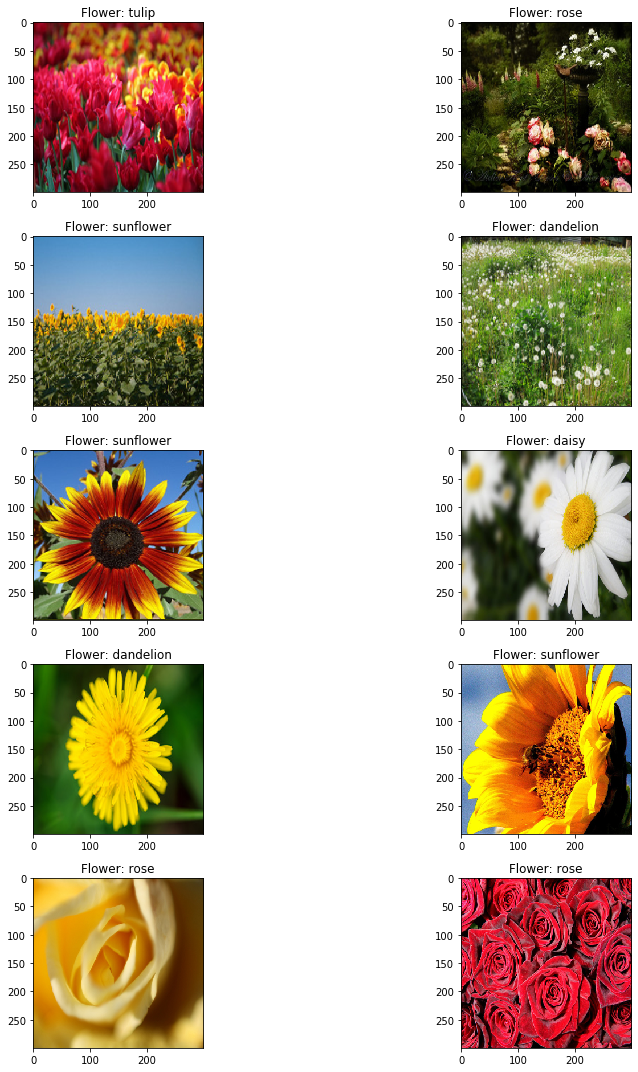

In [9]:
#some changes
'''
print('Label: ', class_names[flower_targets[168]])
flower_image = cv2.imread("/home/edoardospinetti/Desktop/Progetto/flower_images_2_new/"+flower_files[168])
rgb_flower_image = cv2.cvtColor(flower_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(3,3))
plt.imshow(rgb_flower_image);
'''
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(flowers))
        flower_image = cv2.imread("/home/edoardospinetti/Desktop/Progetto/flower_images_2_new/"+flower_files[l])
        flower_image = cv2.resize(flower_image, (300,300))
        rgb_flower_image = cv2.cvtColor(flower_image, cv2.COLOR_BGR2RGB)
        ax[i,j].imshow(rgb_flower_image);
        ax[i,j].set_title('Flower: '+ class_names[flower_targets[l]])
plt.tight_layout()

In [10]:
flower_tensors = paths_to_tensor(flower_files);

100%|██████████| 495/495 [00:00<00:00, 538.48it/s]


In [11]:
#some changes
#shuffle = True
x_train, x_test, y_train, y_test = train_test_split(flower_tensors, flower_targets, 
                                    test_size = 0.25, random_state = 42)
[x_train.shape, y_train.shape, x_test.shape, y_test.shape]

[(371, 128, 128, 3), (371,), (124, 128, 128, 3), (124,)]

In [12]:
n = int(len(x_test)/2)
x_valid, y_valid = x_test[:n], y_test[:n]
x_test, y_test = x_test[n:], y_test[n:]
x_train.shape, x_test.shape, x_valid.shape, y_train.shape, y_test.shape, y_valid.shape

((371, 128, 128, 3),
 (62, 128, 128, 3),
 (62, 128, 128, 3),
 (371,),
 (62,),
 (62,))

Label:  daisy


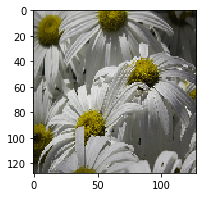

In [13]:
#some changes
print('Label: ', class_names[y_train[1]])
plt.figure(figsize=(3,3))
plt.imshow((x_train[1]/255).reshape(128,128,3));

In [14]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_valid = x_valid.astype('float32')/255

#10->5
c_y_train = to_categorical(y_train, 5)
c_y_test = to_categorical(y_test, 5)
c_y_valid = to_categorical(y_valid, 5)

[x_train.shape, c_y_train.shape, x_test.shape, c_y_test.shape, x_valid.shape, c_y_valid.shape]

[(371, 128, 128, 3),
 (371, 5),
 (62, 128, 128, 3),
 (62, 5),
 (62, 128, 128, 3),
 (62, 5)]

In [15]:
# CNN
def cnn_mc_model():
    model = Sequential()

    model.add(Conv2D(32, (5, 5), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(96, (5, 5)))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

#     model.add(Flatten())
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(512, activation='tanh'))
    model.add(Dropout(0.25)) 
    
#    model.add(Dense(256, activation='tanh'))
#    model.add(Dropout(0.25)) 
    
    model.add(Dense(128, activation='tanh'))
    model.add(Dropout(0.25)) 
    
    #10->5
    model.add(Dense(5))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
    
    return model

cnn_mc_model = cnn_mc_model()

W0812 22:23:25.325817 140178060339008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 22:23:25.356451 140178060339008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 22:23:25.373761 140178060339008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 22:23:25.418131 140178060339008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0812 22:23:25.429311 140178060339008 deprecation_wrapp

In [16]:
cnn_mc_history = cnn_mc_model.fit(x_train, c_y_train, 
                                  epochs=50, batch_size=64, verbose=2,
                                  validation_data=(x_valid, c_y_valid))

W0812 22:23:25.751909 140178060339008 deprecation.py:323] From /home/edoardospinetti/venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 371 samples, validate on 62 samples
Epoch 1/50
 - 14s - loss: 1.9477 - acc: 0.1752 - val_loss: 1.6180 - val_acc: 0.2258
Epoch 2/50
 - 13s - loss: 1.5599 - acc: 0.3127 - val_loss: 1.5534 - val_acc: 0.2419
Epoch 3/50
 - 12s - loss: 1.5013 - acc: 0.3369 - val_loss: 1.4951 - val_acc: 0.3387
Epoch 4/50
 - 11s - loss: 1.5909 - acc: 0.3288 - val_loss: 1.4375 - val_acc: 0.3710
Epoch 5/50
 - 11s - loss: 1.3856 - acc: 0.4232 - val_loss: 1.3503 - val_acc: 0.3871
Epoch 6/50
 - 11s - loss: 1.4360 - acc: 0.3666 - val_loss: 1.3168 - val_acc: 0.4194
Epoch 7/50
 - 11s - loss: 1.4345 - acc: 0.3854 - val_loss: 1.3829 - val_acc: 0.4839
Epoch 8/50
 - 11s - loss: 1.3763 - acc: 0.3908 - val_loss: 1.4486 - val_acc: 0.3226
Epoch 9/50
 - 11s - loss: 1.3662 - acc: 0.4124 - val_loss: 1.2972 - val_acc: 0.3548
Epoch 10/50
 - 11s - loss: 1.4795 - acc: 0.3774 - val_loss: 1.3210 - val_acc: 0.3548
Epoch 11/50
 - 11s - loss: 1.3184 - acc: 0.4367 - val_loss: 1.2531 - val_acc: 0.4516
Epoch 12/50
 - 11s - loss: 1.

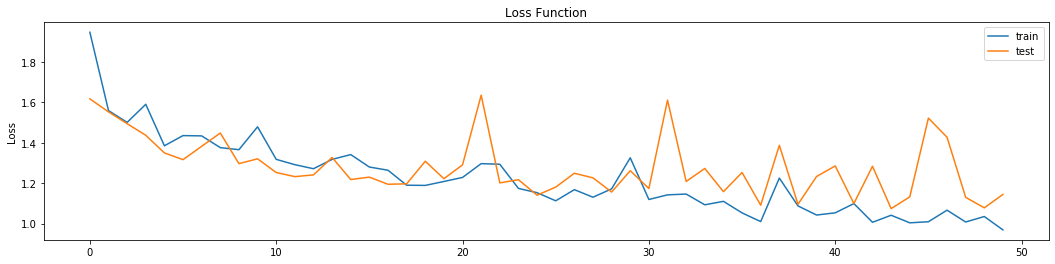

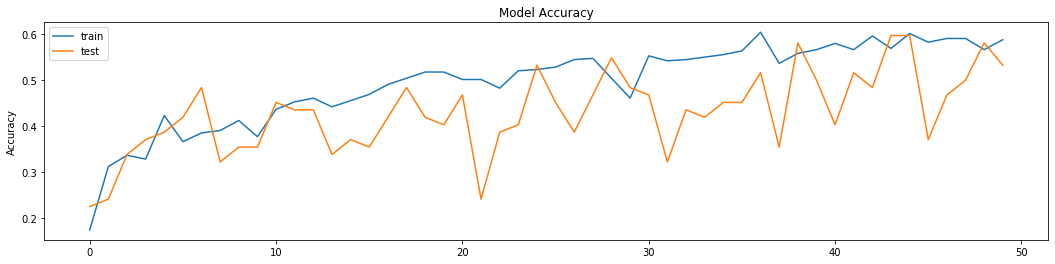

In [17]:
loss_plot(cnn_mc_history)
acc_plot(cnn_mc_history)

In [18]:
cnn_mc_test_score = cnn_mc_model.evaluate(x_test, c_y_test)
cnn_mc_test_score

62/62 [==============================] - 0s 7ms/step


[1.5231897830963135, 0.45161290322580644]